<h1>線形回帰モデル【ボストンデータセット】</h1>

<h2>必要モジュールとデータのインポート</h2>

In [ ]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# ボストンデータをインポート
boston = load_boston()

In [ ]:
#カラム名を確認
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
#data変数(説明変数)の中身を確認
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

<h2>データフレームの作成</h2>

In [ ]:
#　説明変数をDataFrameへ変換
df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# 目的変数をDataFrameへ追加
df['PRICE'] = np.array(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<h2>データの確認</h2>

ボストンデータセットは506レコード  
特徴量は13カラム  
欠損値はないことを確認できる。 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


ヒートマップを作成することで相関を確認できる。  
0に近い→相関が小さい  
値が正→正の相関  
値が負→負の相関  

目的変数price(価格)に対して、RM(部屋数)は0.7と正の相関が強く、部屋数が増えることで価格は高くなることがわかる。  
一方で、CRIMは-0.39(犯罪率)と負の相関があり、犯罪率が増えると価格は安くなることがわかる。

特徴量変数間の相関を確認することで多重共線性の確認もできる。

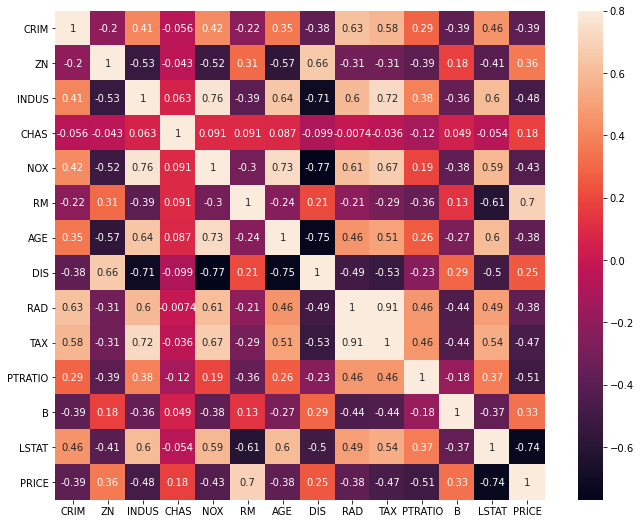

In [ ]:
# ヒートマップを作成
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)

<h1>前処理</h1>

In [ ]:
# 特徴量と目的変数を分ける
df_X = df.drop(['PRICE'], axis=1)
df_y = df['PRICE']

In [ ]:
# 特徴量を標準化する
scaler = StandardScaler()
df_Xs = scaler.fit_transform(df_X)
df_Xs = pd.DataFrame(df_Xs, columns=boston.feature_names)

In [ ]:
df_Xs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [ ]:
# 70%を学習用、30%を検証用データにするよう分割(ホールドアウト法)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.3, random_state = 2021)

<h1>回帰分析</h1>



In [ ]:
# オブジェクト生成
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

<h1>モデルの検証</h1>

In [ ]:
# 回帰係数と切片を出力
print('回帰係数：', model.coef_)
print('切片：', model.intercept_)

回帰係数： [-1.30201165e-01  4.88385048e-02  8.29798562e-03  3.21925464e+00
 -1.71540298e+01  3.91023508e+00  1.23553353e-02 -1.46858684e+00
  3.51456285e-01 -1.18397321e-02 -9.19578131e-01  1.09689570e-02
 -5.93743070e-01]
切片： 33.91584817088892


In [ ]:
# 学習用、検証用データに関して平均二乗誤差を出力
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, pred_train), mean_squared_error(y_test, pred_test)))
# 学習用、検証用データに関してR^2を出力
print('R^2 Train : %.3f, Test : %.3f' % (r2_score(y_train, pred_train), r2_score(y_test, pred_test)))

MSE Train : 22.468, Test : 21.682
R^2 Train : 0.757, Test : 0.666


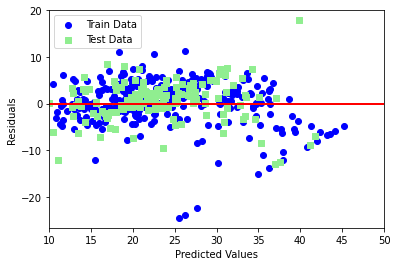

In [ ]:
# 学習用、検証用それぞれで残差をプロット
plt.scatter(pred_train, pred_train - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(pred_test, pred_test - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([10, 50])
plt.show()

<h1>Ridge回帰分析</h1>

In [ ]:
# Ridge回帰のオブジェクト作成
RIDGE = Ridge()
RIDGE.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
# 予測
pred_train_R = RIDGE.predict(X_train)
pred_train_R = RIDGE.predict(X_train)
pred_test_R = RIDGE.predict(X_test)

In [ ]:
# 学習用、検証用データに関して平均二乗誤差を出力
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, pred_train_R), mean_squared_error(y_test, pred_test_R)))
# 学習用、検証用データに関してR^2を出力
print('R^2 Train : %.3f, Test : %.3f' % (r2_score(y_train, pred_train_R), r2_score(y_test, pred_test_R)))

MSE Train : 22.678, Test : 22.002
R^2 Train : 0.755, Test : 0.661


<h1>Lasso回帰分析</h1>

In [ ]:
# Lasso回帰のオブジェクト作成
LASSO = Lasso()
LASSO.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# 予測
pred_train_L = LASSO.predict(X_train)
pred_train_L = LASSO.predict(X_train)
pred_test_L = LASSO.predict(X_test)

In [ ]:
# 学習用、検証用データに関して平均二乗誤差を出力
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, pred_train_L), mean_squared_error(y_test, pred_test_L)))
# 学習用、検証用データに関してR^2を出力
print('R^2 Train : %.3f, Test : %.3f' % (r2_score(y_train, pred_train_L), r2_score(y_test, pred_test_L)))

MSE Train : 27.390, Test : 24.980
R^2 Train : 0.704, Test : 0.616
